### Importing Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px

### Loading DataSet

In [2]:
iris = datasets.load_iris()

### Showing DataSet

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Showing Dataset in a Dataframe for better understanding

In [4]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Ploting the data

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

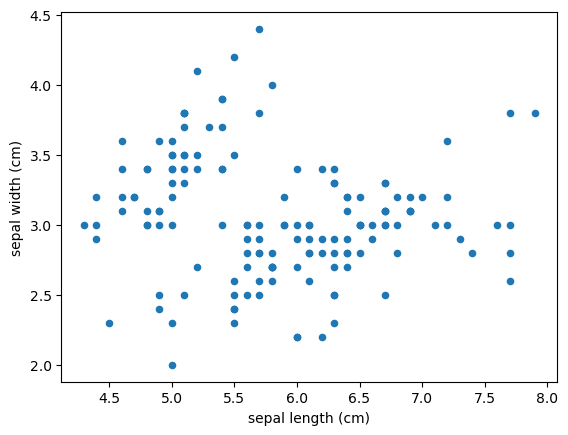

In [6]:
# We'll use this to make a scatterplot of the Iris features.
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

In [7]:
df.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000


# Checking empty values

In [8]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Assigning target and feature variables

In [9]:
x = iris.data
y = iris.target

# Using the elbow method to find the optimal number of clusters for k-means clustering

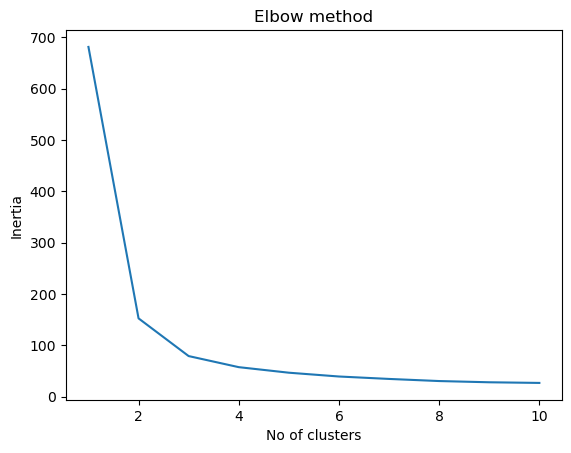

In [10]:
SSE =[]
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters = clusters,n_init=10)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), SSE)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

The cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.

Here, Our optimal cluster value is between 3 and 4. So, let's select 3 as our num of clusters.



# Applying K-mean 

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(x)

centroids = kmeans.cluster_centers_
print(centroids)
print(clusters)


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Showing Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

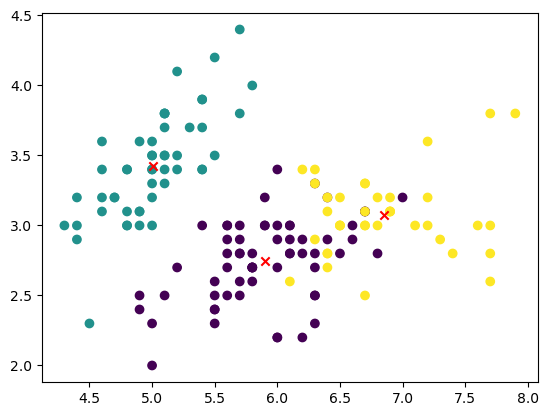

In [12]:
plt.scatter(x[:,0], x[:,1], c=clusters)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="red")
plt.show

In [13]:
x.shape

(150, 4)

In [14]:
pca = PCA().fit(x)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print('Explained Variance Ratio:', pca.explained_variance_ratio_[:10])
print('Cumulative Sum:', cumulative_variance_ratio[:10])

Explained Variance Ratio: [0.92461872 0.05306648 0.01710261 0.00521218]
Cumulative Sum: [0.92461872 0.97768521 0.99478782 1.        ]


The cumulative sum shows that the first component alone explains 92.46% of the variance, the first two components explain 97.77%, the first three components explain 99.48%, and all four components together explain 100% of the variance in the data.

In general, we want to select the number of principal components that explain a large amount of the variance in the data while keeping the number of components as small as possible to avoid overfitting. Based on the cumulative sum, we are going to choose the first three principal components (which explains 99.47% variance of the data). The


# Applying PCA

In [15]:
pca = PCA(n_components=3)
x_reduced = pca.fit_transform(x)
x_reduced.shape

(150, 3)

# Again Applying K-Mean

In [16]:
model = KMeans(n_clusters=3, n_init=4, max_iter=50)
model.fit(x_reduced)
all_predictions = model.predict(x_reduced)
centroids = model.cluster_centers_
centroids

array([[ 0.67566229, -0.31520477, -0.04217302],
       [-2.64241546,  0.19088505,  0.01358128],
       [ 2.37446608,  0.26311694,  0.05093851]])

# Showing plotting to see the difference

<function matplotlib.pyplot.show(close=None, block=None)>

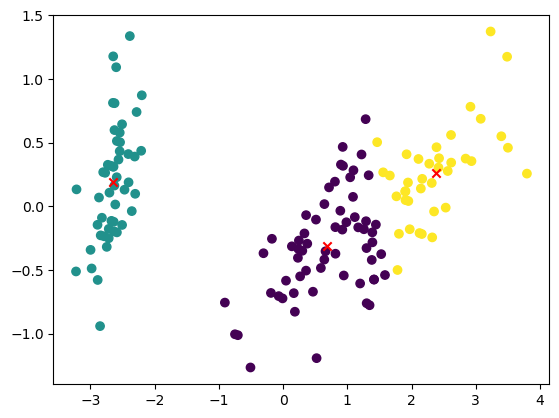

In [17]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="red")
plt.show

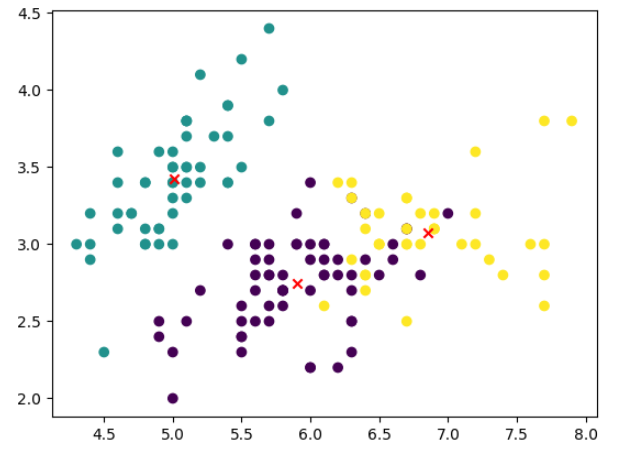

In [19]:
from IPython.display import Image
before=Image(filename='before_PCA.png')
before

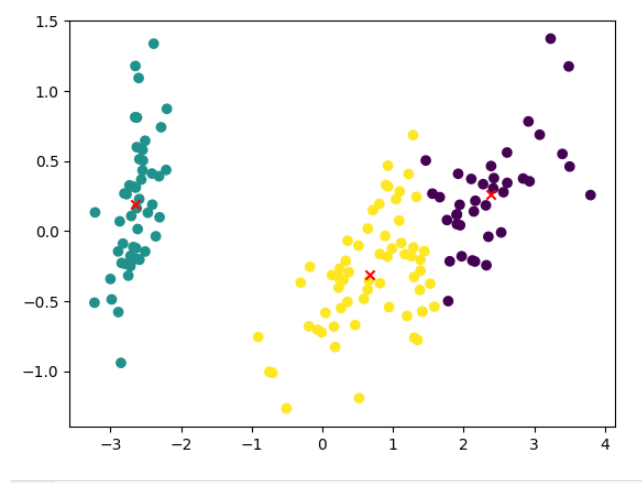

In [20]:
after=Image(filename='after_PCA.png')
after

# Conclusion

After applying the PCA method, which is a technique used to reduce the dimensionality of data while retaining most of the original information, we can visualize the result on the above graph. The graph shows that the clusters of data points are now more separated from each other compared to the original data before PCA. Additionally, the data points themselves appear to be closer to each other, indicating that they are now more similar in terms of their overall characteristics. This suggests that the PCA method has successfully reduced the complexity of the data, making it easier to analyze and interpret.




